<a href="https://colab.research.google.com/github/blackdragonae/h0wsh2021/blob/main/fitspec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fit Spectra**

Sincronizando el Drive de google 

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importando las librerias necesarias para los calculos

In [10]:
import os
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
import numpy as np
from scipy.signal import find_peaks

Función para leer los espectros

In [5]:
def spread(spath):
    hdul = fits.open(spath)
    data = hdul[1].data

    # print hdul.info()
    # print(repr(hdul[1].header))
    RA = hdul[1].header['RAOBJ']
    DEC = hdul[1].header['DECOBJ']
    Z = hdul[1].header['Z']
    ZERR = hdul[1].header['Z_ERR']

    vflux = data.flux
    vwave = data.wavelength

    c = SkyCoord(ra=RA*u.degree, dec=DEC*u.degree, frame='icrs')
    jname =  'J{0}{1}'.format(c.ra.to_string(unit=u.hourangle, sep='' \
          , precision=0, pad=True), c.dec.to_string(sep='', precision=0 \
          , alwayssign=True, pad=True))
    return jname, vwave, vflux

Función para cálcular corrimientos al rojo

In [6]:
def redshift(dpath, lines):
    lpath = dpath + 'indat/lines.dat'
    ldat = Table.read(lpath, format='csv')
    elin = ldat['Air']
    olin = sorted(lines, reverse = True)
    ix = min(len(ldat), len(olin))
    vz = (olin[0:ix] - elin[0:ix])/elin[0:ix]
    z = np.mean(vz)
    zErr = np.std(vz)
    return z, zErr

Inicio del codigo principal, definición del directorio de datos

In [7]:
# Main Code
dpath = '/content/drive/MyDrive/h0wsh2021/dat/'
print('Data path:', dpath)

Data path: /content/drive/MyDrive/h0wsh2021/dat/


J132347-013252


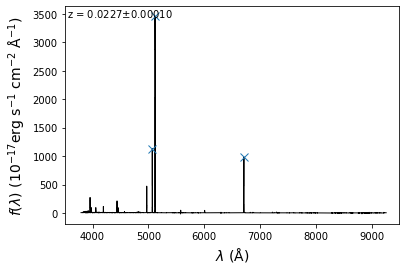

J222510-001153


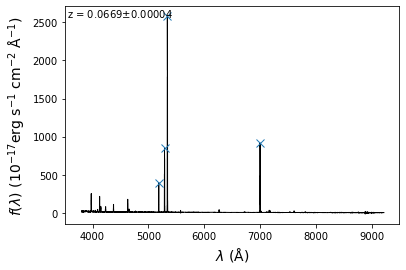

J221824+003918


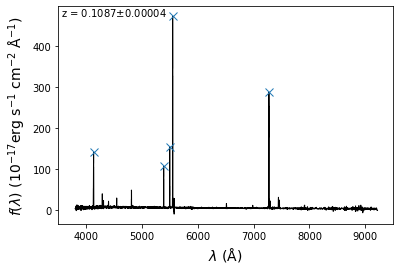

J230704+011311


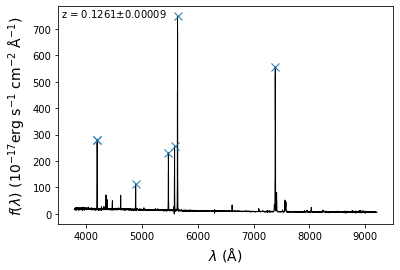

J232937-011057


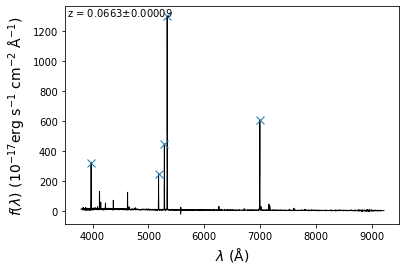

J013345+005711


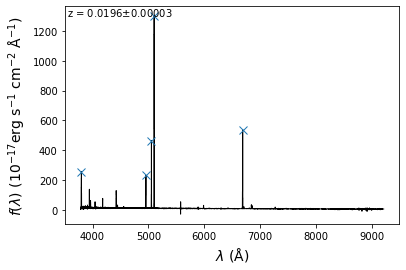

J025426-004123


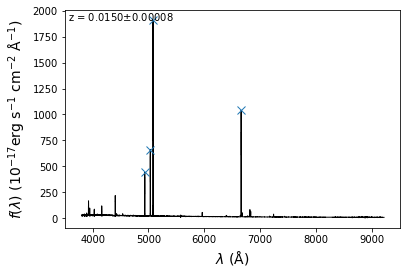

J033527-003811


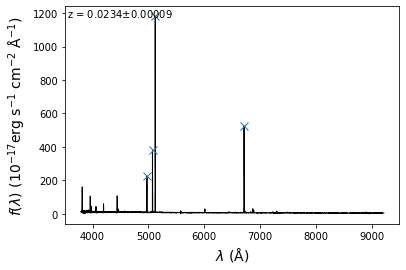

J082531+504804


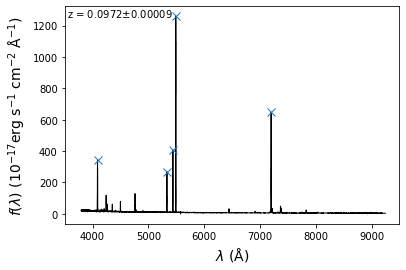

J024454-082138


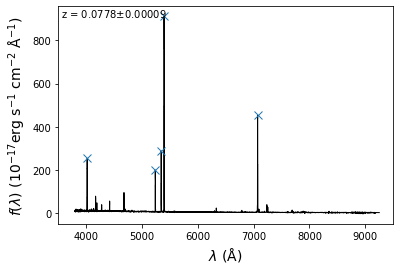

J030321-075923


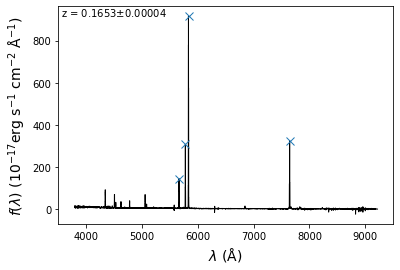

J031024-083433


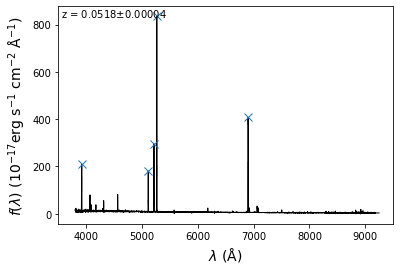

J091652+003114


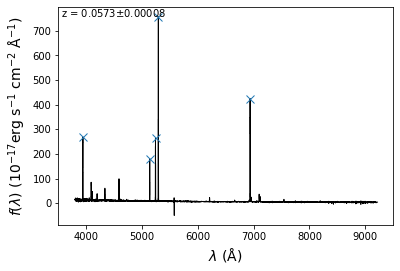

J092918+002813


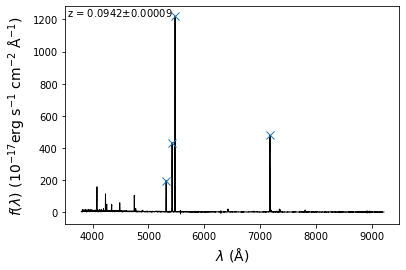

J101431+004755


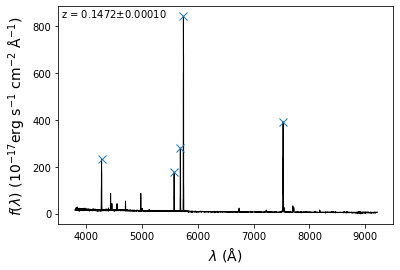

J103412+014249


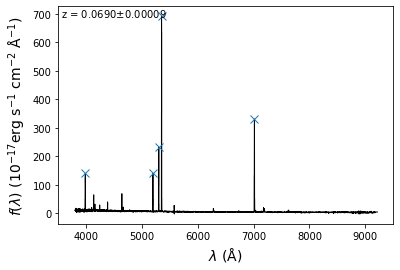

J105331+011740


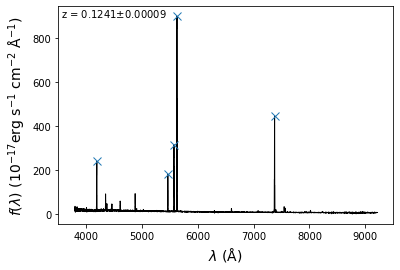

J105210+032713


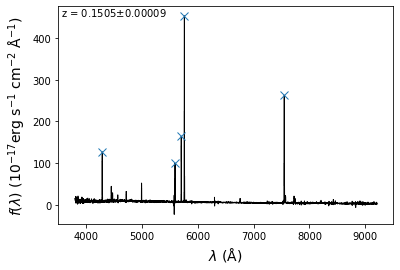

J104458+035313


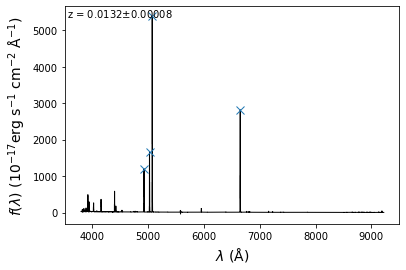

J105326+043014


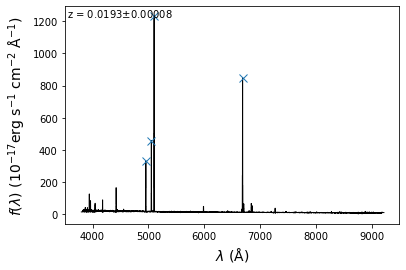

J210114-055510


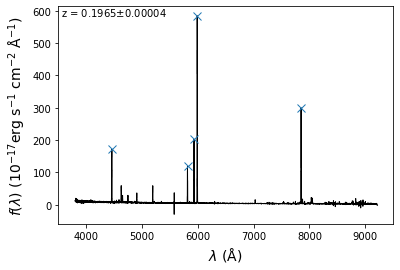

J210502-062239


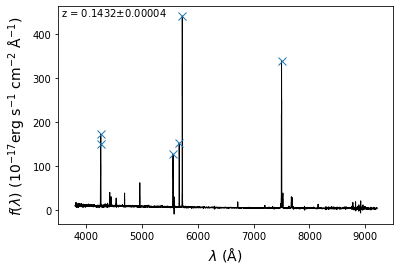

J211902-074227


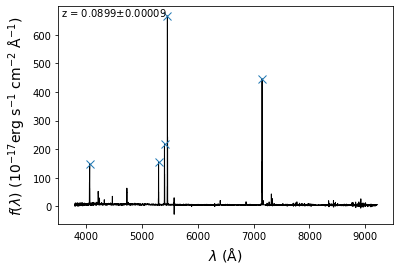

J211527-075951


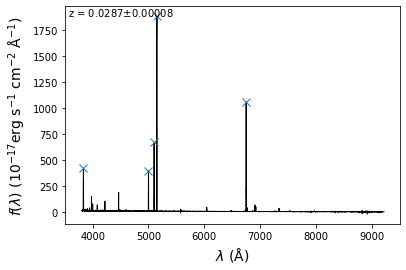

J212333-074831


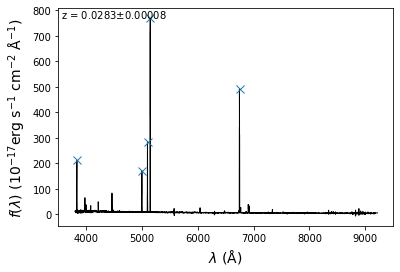

J001648-104742


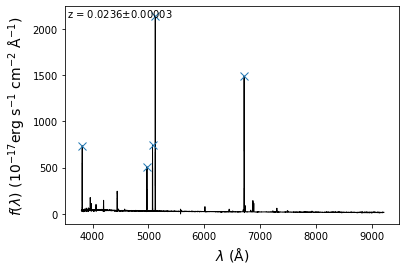

J005602-101009


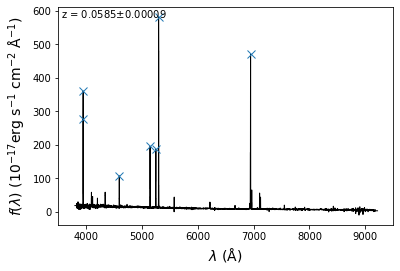

J014137-091435


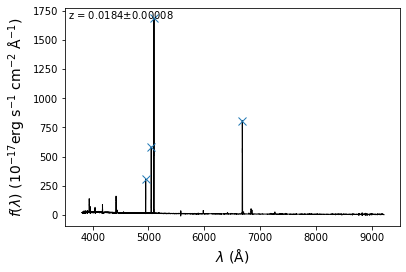

J022038-092907


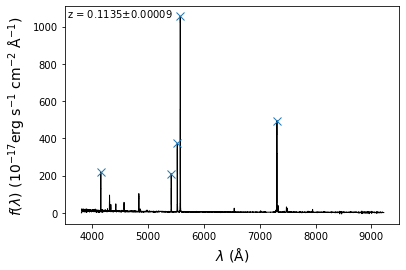

J021853-091219


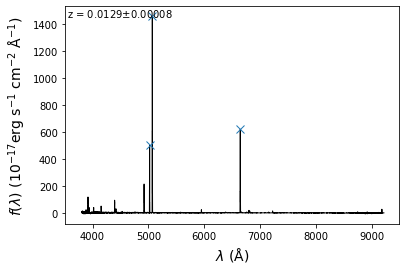

J231442+010621


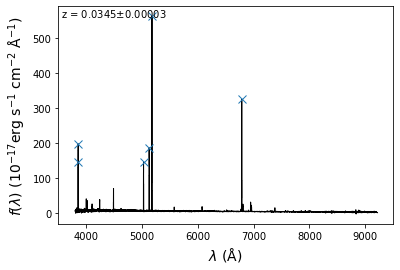

J000657+005126


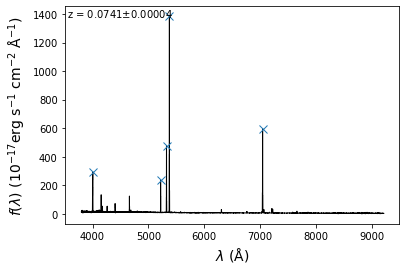

J220803+131335


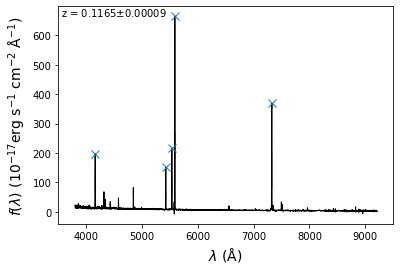

J224557+125022


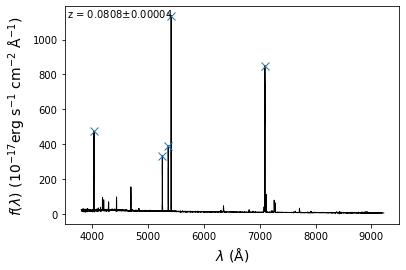

J225140+132713


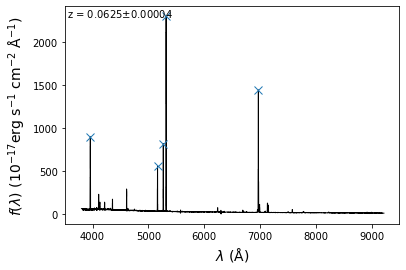

J230118+135230


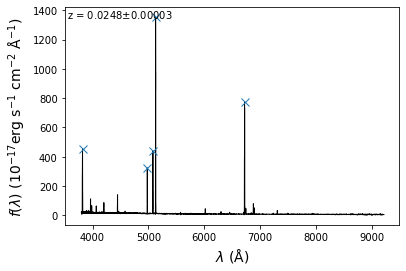

J002426+140411


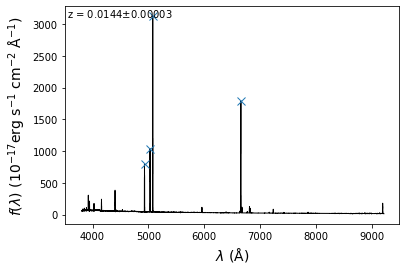

J080001+274642


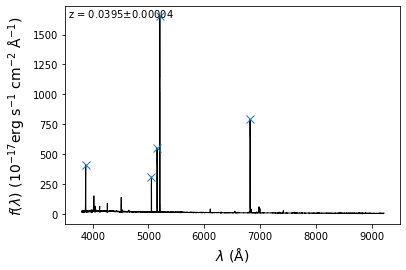

J081334+313252


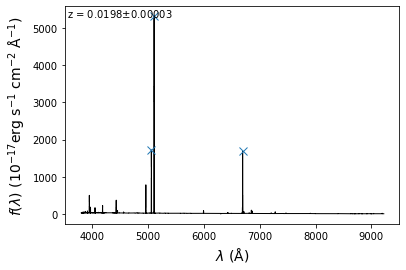

J094810+425714


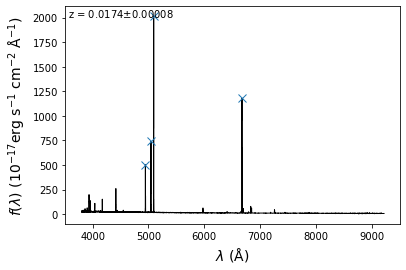

J171237+321633


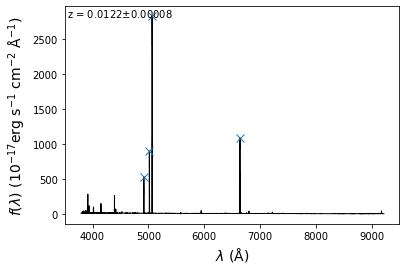

J104756+073951


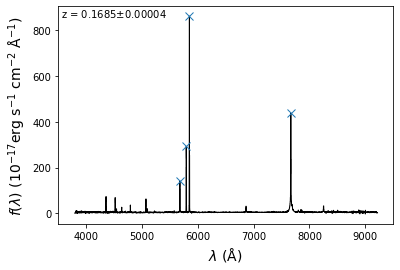

J105941+080057


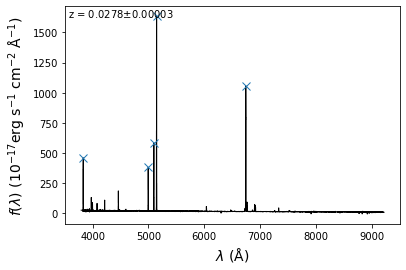

J214351-072004


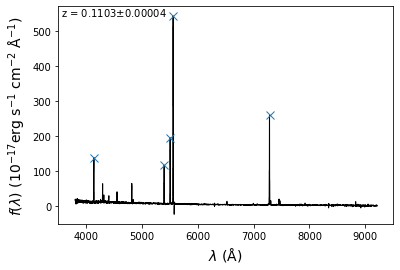

J092541+063117


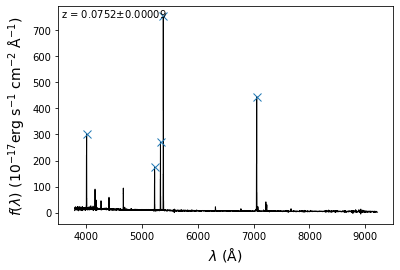

J095546+413430


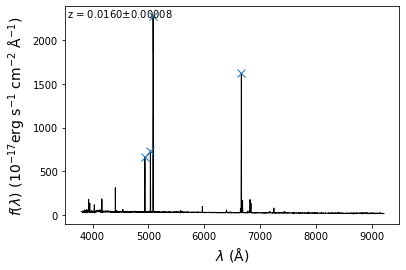

J103509+094517


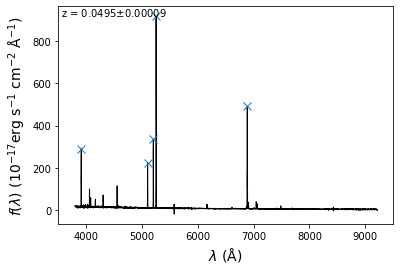

J084219+300704


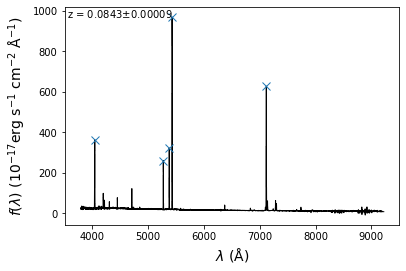

J092749+084037


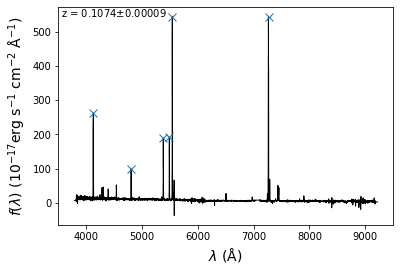

J081404+235329


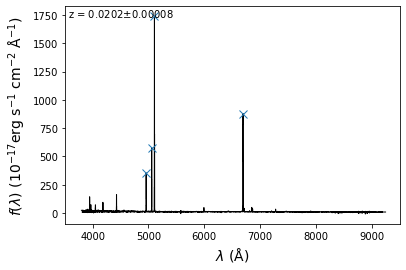

J104829+111520


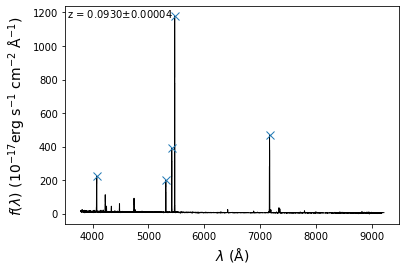

J121329+114057


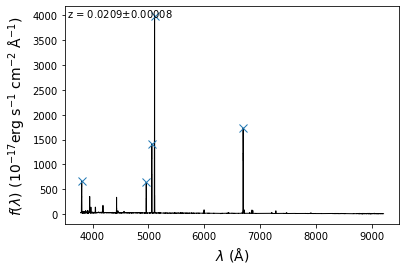

J131235+125743


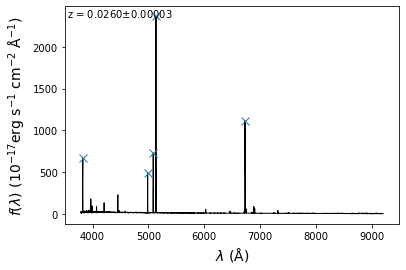

J101157+130822


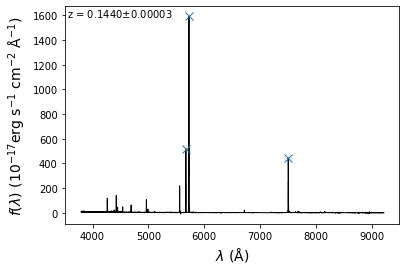

J082520+082723


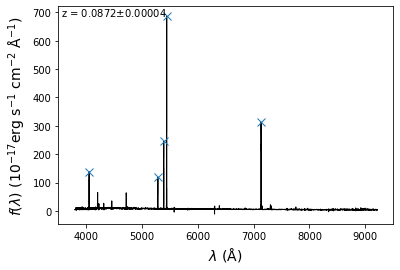

J081421+575008


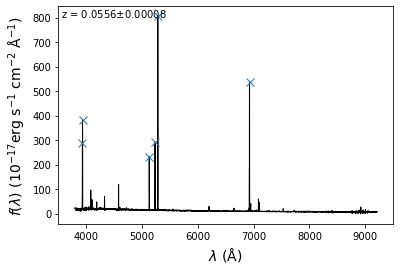

J074947+154013


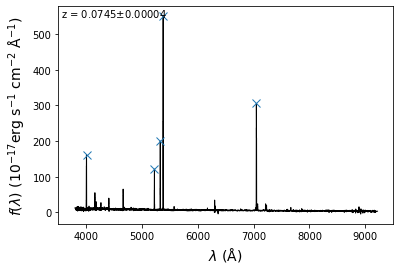

J082723+202613


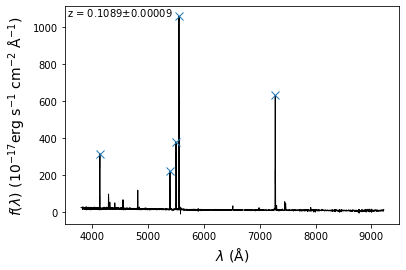

J090418+260106


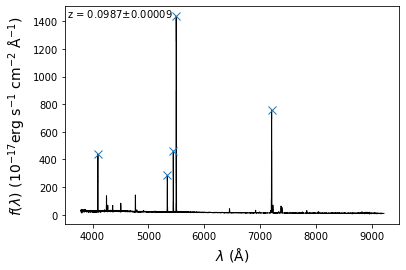

J094254+340412


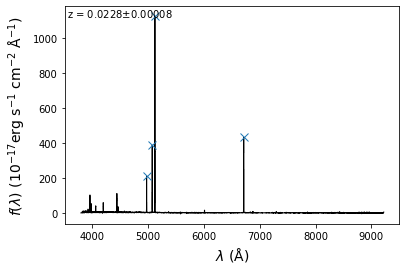

J095228+322809


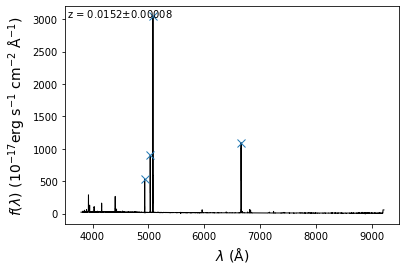

J095001+300341


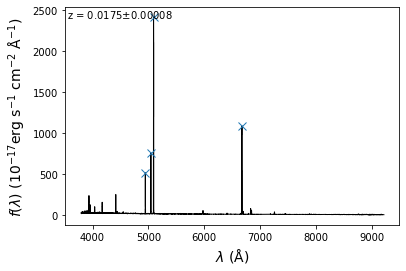

J142343+225729


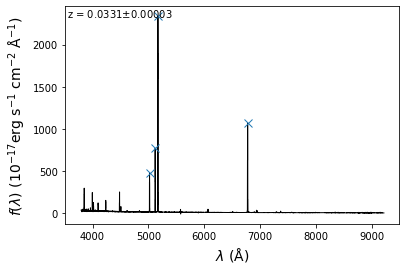

J084000+180531


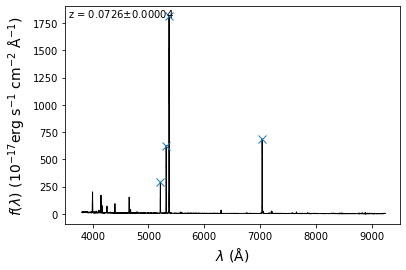

J090507+223834


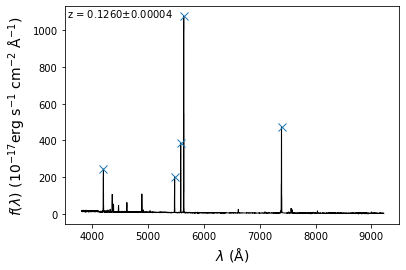

J103227+271755


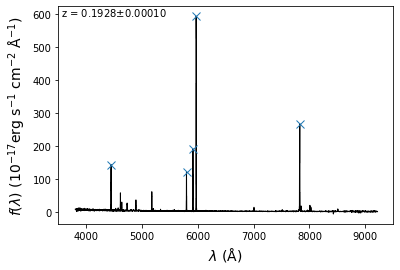

J103727+270800


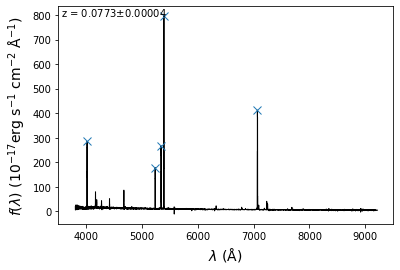

J094001+203123


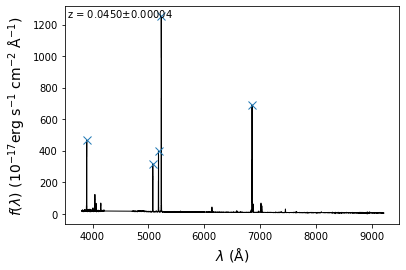

J100720+193350


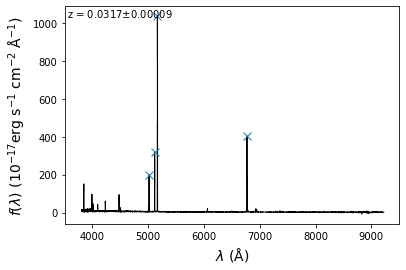

J083946+140033


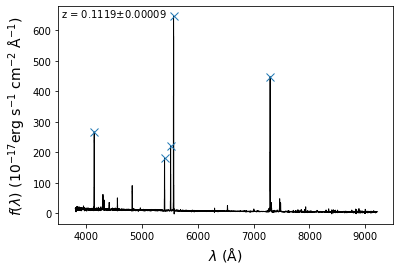

J091641+182808


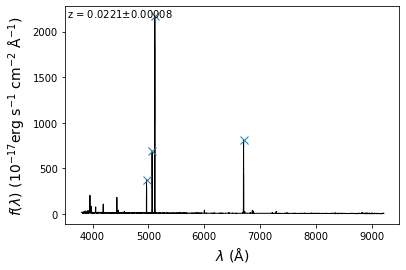

J110839+223810


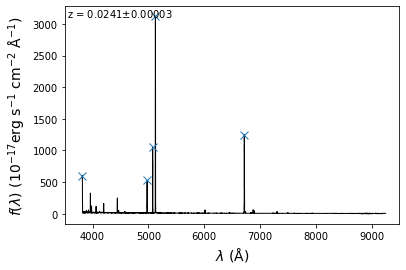

In [11]:
spath = dpath + 'indat/spec/DR8spectra/'
nspec = [f for f in listdir(spath) if isfile(join(spath, f))]

for i in nspec:
    ispath = spath + i
    # print ispath
    jname, vx, vy = spread(ispath)
    print(jname)
    peaks, _ = find_peaks(vy, height = 0.15*max(vy))

    olines = vx[peaks]

    z, zErr = redshift(dpath, olines)

    # Ploting
    path = dpath + 'results/sp' + jname + '.pdf'

    xmin = 3500.0
    xmax = 9500.0
    ymin = min(vy) - 0.05*max(vy)
    ymax = max(vy) + 0.05*max(vy)

    xl = "$\lambda\ (\mathrm{\AA})$"
    yl = "$f(\lambda)\ (10^{-17} \mathrm{erg\ s^{-1}\ cm^{-2}\ \AA^{-1}}$)"

    plt.figure()
    plt.plot(vx, vy, '-', lw = 1, c = 'black', drawstyle='steps')
    plt.plot(vx[peaks], vy[peaks], "x", markersize=8)
    plt.text(3550.0, ymax - 0.05*ymax, r'z = ' + str("%5.4f" % z) + \
             r'$\pm$' + str("%5.5f" % zErr))
    plt.axis([xmin, xmax, ymin, ymax])
    plt.xlabel(xl, fontsize=14)
    plt.ylabel(yl, fontsize=14)
    plt.savefig(path)
    plt.show()
    plt.close()